In [1]:
#import dependencies 
from path import Path
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#import data
file_path = Path("./Resources/cbp_clean.csv")
cbp_df = pd.read_csv(file_path, low_memory=False)
cbp_df.head()

,unique_id,date_in,date_out,hours_in_custody,age_group,gender,year_in,month_in,year_out,month_out,country_code,days_in_custody
0,0,2017-01-20,2017-01-20,9.95,4,2,2017,1,2017,1,1,0.41
1,1,2017-01-20,2017-01-24,113.23,3,2,2017,1,2017,1,2,4.72
2,2,2017-01-20,2017-01-24,113.42,3,2,2017,1,2017,1,4,4.73
3,3,2017-01-20,2017-01-21,30.08,6,1,2017,1,2017,1,1,1.25
4,4,2017-01-20,2017-01-21,36.53,3,1,2017,1,2017,1,5,1.52


In [3]:
cbp_df['hours_in_custody'].describe()

count    582208.000000
mean         64.851608
std          53.391101
min           0.010000
25%          31.130000
50%          53.170000
75%          85.930000
max         991.220000
Name: hours_in_custody, dtype: float64

In [4]:
#identify upper outliers
IQR = 85.93-31.13
(IQR*1.5) + 85.93

168.13000000000002

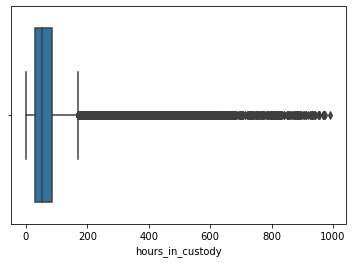

In [5]:
sns.boxplot(x=cbp_df['hours_in_custody'])

In [6]:
# Remove negative values and outliers
cbp_df.drop(cbp_df[cbp_df['hours_in_custody']>168.13].index, inplace=True)
cbp_df.drop(cbp_df.loc[cbp_df['hours_in_custody']<=0].index, inplace=True)

In [7]:
cbp_df

,unique_id,date_in,date_out,hours_in_custody,age_group,gender,year_in,month_in,year_out,month_out,country_code,days_in_custody
0,0,2017-01-20,2017-01-20,9.95,4,2,2017,1,2017,1,1,0.41
1,1,2017-01-20,2017-01-24,113.23,3,2,2017,1,2017,1,2,4.72
2,2,2017-01-20,2017-01-24,113.42,3,2,2017,1,2017,1,4,4.73
3,3,2017-01-20,2017-01-21,30.08,6,1,2017,1,2017,1,1,1.25
4,4,2017-01-20,2017-01-21,36.53,3,1,2017,1,2017,1,5,1.52
...,...,...,...,...,...,...,...,...,...,...,...,...
582203,583803,2020-06-18,2020-06-18,4.77,7,1,2020,6,2020,6,7,0.20
582204,583804,2020-06-18,2020-06-19,21.62,7,1,2020,6,2020,6,7,0.90
582205,583805,2020-06-19,2020-06-19,2.81,6,2,2020,6,2020,6,7,0.12
582206,583806,2020-06-19,2020-06-20,20.76,7,2,2020,6,2020,6,7,0.87


# Exploratory Analysis

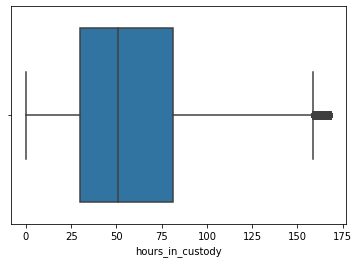

In [8]:
#View boxplot after uniforming 
sns.boxplot(x=cbp_df['hours_in_custody'])

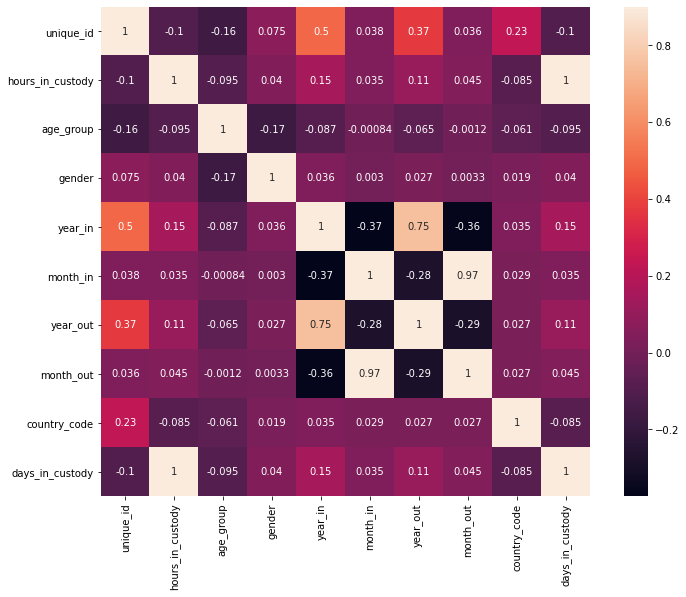

In [9]:
#correlation map 
corr_matrix = cbp_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=0.9, annot=True, square=True)
#time in custody doesn't appear to be influenced by any of these factors, which is interesting considering
#the bias that exists in the data

In [ ]:
sns.set()
cols = ['age_group', 'gender', 'country_code', 'days_in_custody']
sns.pairplot(cbp_df[cols], height = 2.5)
plt.show()

# Multiple Linear Regression

In [ ]:
#Multiple Linear Regression 
# declare x, y 
y = cbp_df['days_in_custody']
X = cbp_df[['age_group', 'gender', 'country_code']]

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

In [ ]:
#Check intercept and coefficient
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

In [ ]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

# Logisitic Regression

In [10]:
# Decide on binary options to classify data based on other features. In this case, we will use
# the average amount of time in custody to predict who would stay in equal to or below average custody 
# or who'd be above average time spent in custody 
#First, identify average time spent in custody using the log transformation column pulled from hours in custody
cbp_df['days_in_custody'].describe()

count    560735.000000
mean          2.419563
std           1.518406
min           0.000000
25%           1.250000
50%           2.110000
75%           3.390000
max           7.010000
Name: days_in_custody, dtype: float64

In [11]:
#Create column to indicate those who spent above average time in detention and those who did not

cbp_df['long_detention'] = np.where(cbp_df['days_in_custody']>2.419563, 1,0)
cbp_df

,unique_id,date_in,date_out,hours_in_custody,age_group,gender,year_in,month_in,year_out,month_out,country_code,days_in_custody,long_detention
0,0,2017-01-20,2017-01-20,9.95,4,2,2017,1,2017,1,1,0.41,0
1,1,2017-01-20,2017-01-24,113.23,3,2,2017,1,2017,1,2,4.72,1
2,2,2017-01-20,2017-01-24,113.42,3,2,2017,1,2017,1,4,4.73,1
3,3,2017-01-20,2017-01-21,30.08,6,1,2017,1,2017,1,1,1.25,0
4,4,2017-01-20,2017-01-21,36.53,3,1,2017,1,2017,1,5,1.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
582203,583803,2020-06-18,2020-06-18,4.77,7,1,2020,6,2020,6,7,0.20,0
582204,583804,2020-06-18,2020-06-19,21.62,7,1,2020,6,2020,6,7,0.90,0
582205,583805,2020-06-19,2020-06-19,2.81,6,2,2020,6,2020,6,7,0.12,0
582206,583806,2020-06-19,2020-06-20,20.76,7,2,2020,6,2020,6,7,0.87,0


In [12]:
# create dataframe for logistic regression that only uses features I want to analyze
cbp_for_logreg = cbp_df[['age_group', 'gender', 'year_in', 'year_out', 'long_detention', 'country_code']]
cbp_for_logreg

,age_group,gender,year_in,year_out,long_detention,country_code
0,4,2,2017,2017,0,1
1,3,2,2017,2017,1,2
2,3,2,2017,2017,1,4
3,6,1,2017,2017,0,1
4,3,1,2017,2017,0,5
...,...,...,...,...,...,...
582203,7,1,2020,2020,0,7
582204,7,1,2020,2020,0,7
582205,6,2,2020,2020,0,7
582206,7,2,2020,2020,0,7


In [13]:
# separate features from target
y = cbp_for_logreg['long_detention']
X = cbp_for_logreg.drop(columns='long_detention')

In [14]:
#split data into training and testing 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y)
X_train.shape

(420551, 5)

In [15]:
# create logistic regression model 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=300000)

In [16]:
# fit/train model 
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=300000)

In [17]:
y_pred = classifier.predict(X_test)
logresults = pd.DataFrame({"Prediction": y_pred, "Actual": y_test, "Gender": X_test.gender, "Country Code": X_test.country_code, "Age Group": X_test.age_group, "Year In": X_test.year_in, "Year Out": X_test.year_out}).reset_index(drop=True)
logresults.head(20)

,Prediction,Actual,Gender,Country Code,Age Group,Year In,Year Out
0,0,1,1,5,6,2019,2019
1,1,0,1,1,3,2018,2018
2,0,0,2,7,4,2017,2017
3,0,0,1,5,7,2017,2017
4,0,1,2,2,5,2018,2018
5,0,0,1,4,6,2019,2019
6,0,0,1,7,7,2018,2018
7,0,1,1,5,7,2019,2019
8,0,0,1,5,6,2017,2017
9,0,1,1,2,7,2019,2019


In [18]:
# Export to csv
logresults.to_csv(r'/Users/ebonybrown/Desktop/My_Projects/CBP_Detentions/Resources/logresults.csv')

In [21]:
from sklearn.metrics import accuracy_score
print(f'Accuracy Score: {accuracy_score(y_test, y_pred):.2f}')

Accuracy Score: 0.55


In [20]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()  

In [ ]:
#Confusion matrix
logcm = confusion_matrix(y_test, y_pred)
logresultscm = pd.DataFrame(logcm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
logresultscm.head(20)

# Decision Tree

In [ ]:
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
cbp_df.head()

In [ ]:
#narrow data set for decision tree model
cbp_treedf = cbp_df[["age_group", "gender", "year_in", "month_in", "year_out", "month_out", "long_detention", "country_code"]]
cbp_treedf

In [ ]:
# define features set
X = cbp_treedf.copy()
X = X.drop("long_detention", axis=1)
X.head()

In [ ]:
y = cbp_treedf["long_detention"].values.reshape(-1,1)
y[:5]

In [ ]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, train_size=0.80)

In [ ]:
#Print shapes of testing/training data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [ ]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [ ]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [ ]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

In [ ]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

In [ ]:
# Creating a DF from the predictions vs actual
testdf = pd.DataFrame({'Actual Values':y_test.reshape(-1), 'Predicted Values':predictions.reshape(-1), 'Gender':X_test.gender, 'Age Group': X_test.age_group, 'Year In': X_test.year_in, 'Month In':X_test.month_in, 'Year Out': X_test.year_out, 'Month Out': X_test.month_out, 'Country_Code':X_test.country_code})
testdf

In [ ]:
# Export to csv
testdf.to_csv(r'/Users/ebonybrown/Desktop/My_Projects/CBP_Detentions/Resources/decisiontree.csv')

In [ ]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
cbp_df

In [ ]:
cbp_forestdf = cbp_treedf.copy()
cbp_forestdf

In [ ]:
X = cbp_forestdf.copy()
X = X.drop("long_detention", axis=1)
X.head()

In [ ]:
y = cbp_forestdf["long_detention"].ravel()
y[:5]

In [ ]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, train_size=0.80)

In [ ]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [ ]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [ ]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=200, random_state=78) 

In [ ]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [ ]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [ ]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

In [ ]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

In [ ]:
# END